In [1]:
#Keras Model

In [51]:
from keras.datasets import mnist
from keras.models import load_model,Model
from keras.layers import Dense,Input,Activation
from keras.utils import plot_model
from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard,ModelCheckpoint

import matplotlib.pyplot as plt


In [40]:
#Loading the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
NUM_CLASSES = 10
NUM_TUPLES = x_train.shape[0]

In [41]:
y_train[0]

5

In [42]:
#Preprocessing Steps

#Reshaping images into single dimension arrays
x_train = x_train.reshape(x_train.shape[0], 784).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 784).astype('float32')

#Normalising the data
x_train /= 255.
x_test /= 255.

#Converting labels to categorical datastructure
y_train = to_categorical(y_train,NUM_CLASSES)
y_test = to_categorical(y_test,NUM_CLASSES)

#Splitting training set into validation set
train_size = int(NUM_TUPLES*0.85)
x_validation = x_train[train_size:]
y_validation = y_train[train_size:]
x_train = x_train[0:train_size]
y_train = y_train[0:train_size]

In [43]:
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [44]:
def MNN_Classifier():
    
    input_layer = Input(shape=(784,))
    
    i1 = Dense(64,activation='relu')(input_layer)
    #hl1 = Dense(64,activation='relu')(il)

    
    ol = Dense(10,activation='softmax')(i1)
    
    classifier = Model(inputs=input_layer,outputs=ol)
    
    classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ['accuracy'])
    
    return classifier
    

In [45]:
mnist_classifier = MNN_Classifier()
mnist_classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [46]:
train_history = mnist_classifier.fit(x_train,y_train,batch_size=32,epochs = 10,verbose=True,shuffle=True,
                                     validation_data = (x_validation,y_validation))

Train on 51000 samples, validate on 9000 samples
Epoch 1/10
51000/51000 [==============================] - 7s 137us/step - loss: 0.3478 - acc: 0.9006 - val_loss: 0.1901 - val_acc: 0.9429
Epoch 2/10
51000/51000 [==============================] - 7s 135us/step - loss: 0.1730 - acc: 0.9495 - val_loss: 0.1436 - val_acc: 0.9581
Epoch 3/10
51000/51000 [==============================] - 7s 129us/step - loss: 0.1286 - acc: 0.9628 - val_loss: 0.1145 - val_acc: 0.9670
Epoch 4/10
51000/51000 [==============================] - 7s 129us/step - loss: 0.1003 - acc: 0.9702 - val_loss: 0.1141 - val_acc: 0.9672
Epoch 5/10
51000/51000 [==============================] - 6s 123us/step - loss: 0.0804 - acc: 0.9760 - val_loss: 0.1020 - val_acc: 0.9708
Epoch 6/10
51000/51000 [==============================] - 6s 123us/step - loss: 0.0678 - acc: 0.9804 - val_loss: 0.0895 - val_acc: 0.9723
Epoch 7/10
51000/51000 [==============================] - 7s 130us/step - loss: 0.0566 - acc: 0.9832 - val_loss: 0.0912 - v

In [47]:
help(plot_model)

Help on function plot_model in module keras.utils.vis_utils:

plot_model(model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='TB')
    Converts a Keras model to dot format and save to a file.
    
    # Arguments
        model: A Keras model instance
        to_file: File name of the plot image.
        show_shapes: whether to display shape information.
        show_layer_names: whether to display layer names.
        rankdir: `rankdir` argument passed to PyDot,
            a string specifying the format of the plot:
            'TB' creates a vertical plot;
            'LR' creates a horizontal plot.



In [23]:
print "Testing Accuracy " + str(test_losses[1]*100)

Testing Accuracy 97.46


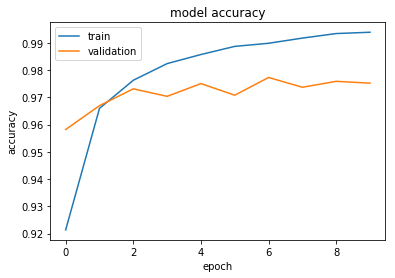

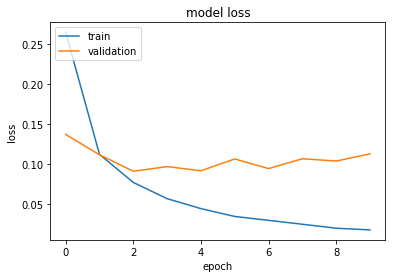

In [30]:
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()